<a href="https://colab.research.google.com/github/Diegodc2737/time_series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Series Temporais**

Sabemos que time series ou series temporais são uma forma de organizar no tempo as informações quantitativas e que podemos extrair muitas informações deste tipo de dado. Porém, nem sempre podemos aplicar a análise de time series.

As séries temporais são é uma coleção de observações feitas num espaço de tempo, que representará cada ponto. Conforme o tempo passa, teremos dados das vendas de cada mês. A motivação para a criação do próprio Pandas foram as análises financeiras.

**existem componentes que geralmente estão presentes nas time series.**



*    Tendênciad
>A tendência refere-se ao movimento de uma série para valores relativamente mais altos ou mais baixos durante um longo período de tempo.
*    Ruído ou Irregularidade
>O ruído ou irregularidade é alguma forma de variação aleatória dentro da time series.
*    Sazonalidade
>A sazonalidade refere-se a um padrão repetitivo dentro de um período de tempo fixo.





**A principal variável em uma time series é o tempo. Sendo assim, a ausência desta variável impossibilita análise de séries temporais.**

# Alucar - Análisando vendas

As séries temporais são é uma coleção de observações feitas num espaço de tempo, que representará cada ponto. Conforme o tempo passa, teremos dados das vendas de cada mês. A motivação para a criação do próprio Pandas foram as análises financeiras.

In [ ]:
import pandas as pd

In [ ]:
pd.read_csv('/content/alucar.csv').head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
alucar = pd.read_csv('/content/alucar.csv')

> Vendo a quantidade de linhas e colunas

In [ ]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


> Vendo se a valores nulls

In [ ]:
print('Valores nulos: ', alucar.isna().sum().sum())

Valores nulos:  0


> amos ver os tipos das colunas

In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
# O mes está no formato object. Temos que converter a DataFrame

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

**Estalando o seaborn**

In [ ]:
!pip install seaborn==0.9.0
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 15.0 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
print(sns.__version__)

0.9.0


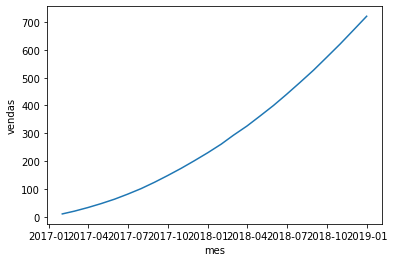

In [ ]:
sns.lineplot(x='mes', y='vendas', data=alucar)

Existem alguns style guides que nos auxiliam na visualização dos gráficos. Um deles é o Urban Institute , um data visualization style guide. Ele poderá ser encontrado neste link.[texto do link](https://urbaninstitute.github.io/graphics-styleguide/)

**Deixando o gráfico mais bonito**


> 1.   A princípio, deixaremos o visual do gráfico mais bonito, setando uma paleta de cores diferente: **sns.set_palette('Accent')**.
> 2.   acrescentaremos um grid, ou seja, uma marcação de linhas entre o crescimento no gráfico. Então, colocaremos: **sns.set_style('darkgrid')**.



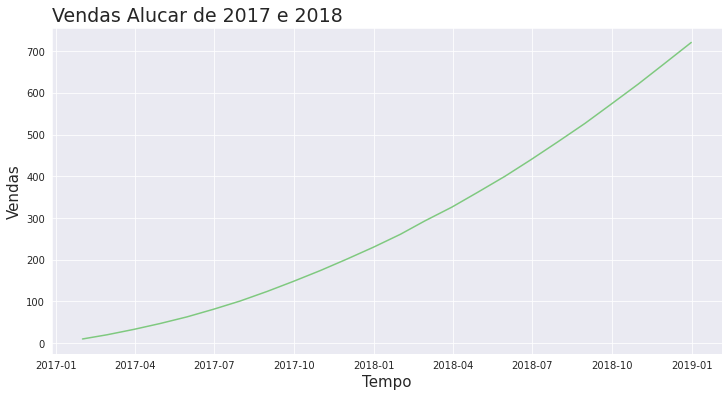

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6) #Tamnho da imagem
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=19) #Titulo,posição e fonte
ax.set_xlabel('Tempo', fontsize=15) #Nome de x e tamanho da fonte
ax.set_ylabel('Vendas', fontsize=15) #Nome de y e tamanho da fonte
ax = ax



> No mês 3, foram 33, e subtrairemos o mês 2. 33¬20 = 13. Faremos isso para todos os períodos. Já existe, no entanto, uma função do Pandas para fazer isso. Selecionando alucar, criaremos uma nova variável para descobrir, de fato, de quanto foi o aumento de um mês para o outro. Chamaremos ela de aumento. Queremos a diferença de um mês para o anterior, e usaremos a função diff. :

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()

In [ ]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


> Agora plotaremos um gráfico, da mesma forma que fizemos com as vendas, porém referente ao aumento dessa vez.

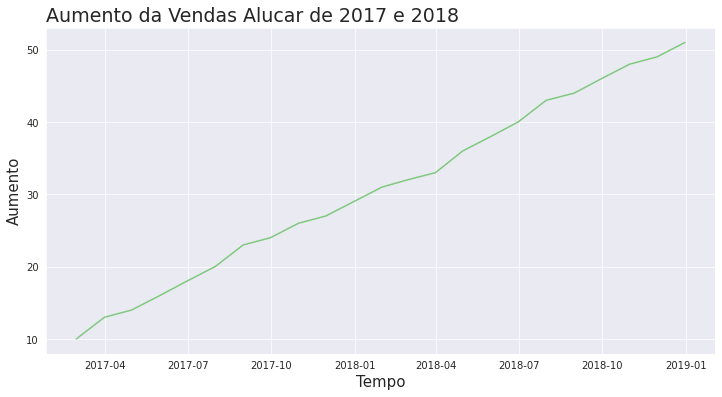

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6) #Tamnho da imagem
ax.set_title('Aumento da Vendas Alucar de 2017 e 2018', loc='left', fontsize=19) #Titulo,posição e fonte
ax.set_xlabel('Tempo', fontsize=15) #Nome de x e tamanho da fonte
ax.set_ylabel('Aumento', fontsize=15) #Nome de y e tamanho da fonte
ax = ax

**Criaremos uma função pra gerar grafico**
>Chamaremos nossa função de plotar. Ela terá algumas propriedades. Incluiremos os parâmetros passíveis de alteração, como título, label x, label y, o valor de x do nosso lineplot, o valor de y e nosso DataSet.

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6) #Tamnho da imagem
  ax.set_title(titulo, loc='left', fontsize=19) #Titulo,posição e fonte
  ax.set_xlabel(labelx, fontsize=15) #Nome de x e tamanho da fonte
  ax.set_ylabel(labely, fontsize=15) #Nome de y e tamanho da fonte
  ax = ax

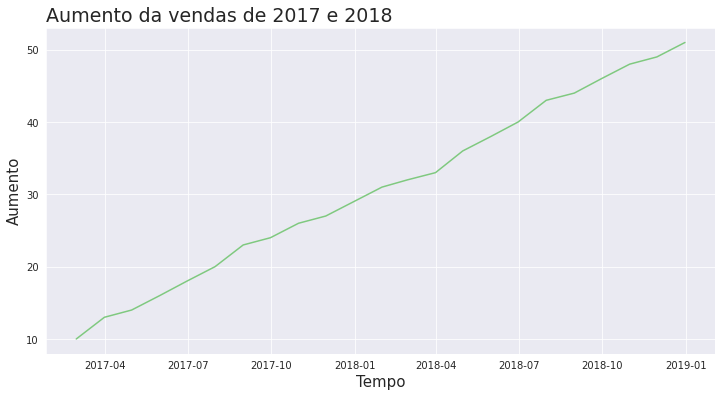

In [ ]:
plotar('Aumento da vendas de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

>Também saberemos qual será a aceleração do crescimento. Criaremos uma nova coluna chamada aceleração, decompondo mais uma vez nosso DataSet.

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


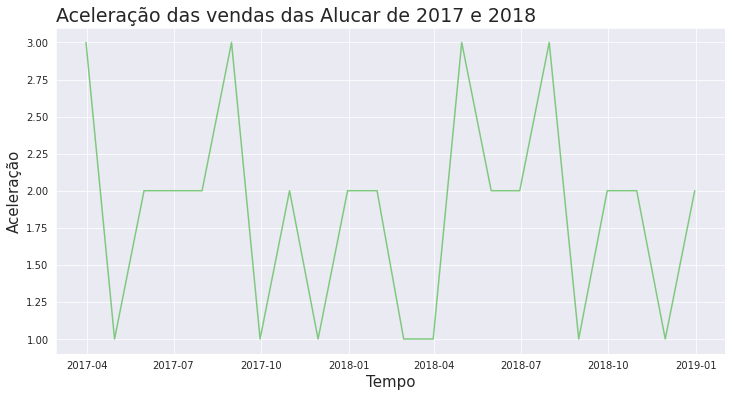

In [ ]:
plotar('Aceleração das vendas das Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)



>Seria mais fácil e intuitivo se tivéssemos esses três gráficos no mesmo lugar, mesmo que em plots diferentes. Vamos melhorar a intuitividade da análise juntando esses gráficos para visualizar todos.

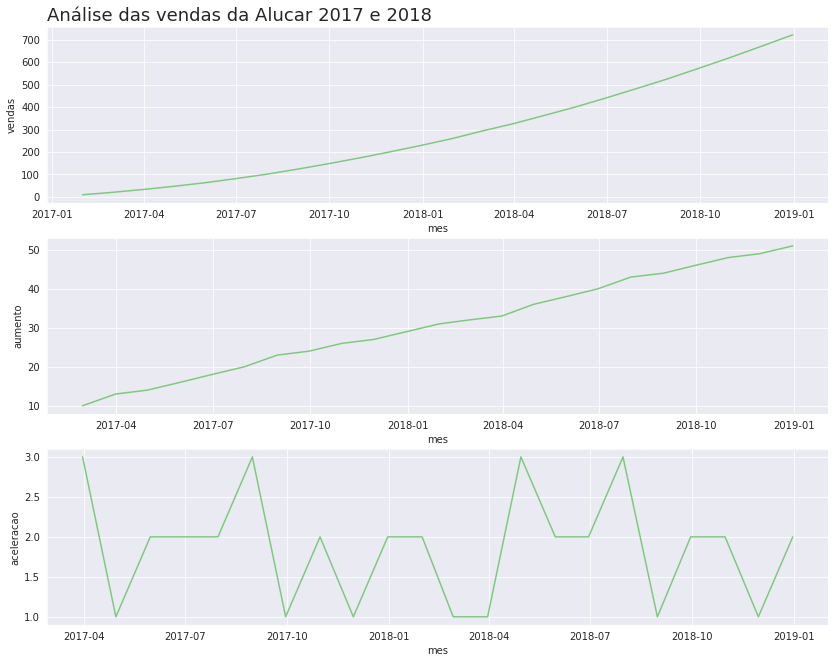

In [ ]:
plt.figure(figsize=(14,11))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [ ]:
# função de gerar 3 gráficos
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
  plt.figure(figsize=(15,11))
  ax = plt.subplot(3,1,1)
  ax.set_title(titulo, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3,1,2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3,1,3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax

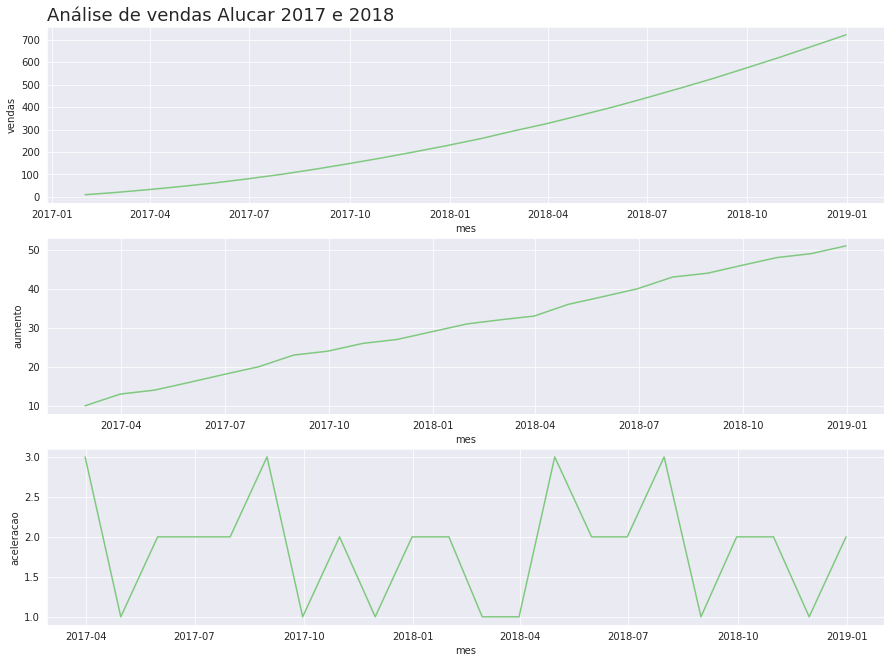

In [ ]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas Alucar 2017 e 2018')

# Autocorrelação



> Poderemos descobrir isso utilizando a função de Autocorrelação. Ela é uma medida de correlação entre as observações de uma série temporal. Para entender melhor o funcionamento dela, comparamos os valores com suas próprias correlações, ou seja, consigo mesmas.

> O nível máximo de correlação que encontraremos será 1. Isso significa que se a correlação for muito alta, o valor a ser encontrado dessa função será 1, e o mínimo, -1. Os valores serão sempre baseados nessa distribuição. O nível de correlação máxima será 1 e o nível de correlação mínima será -1.[texto do link](https://pt.wikipedia.org/wiki/Autocorrela%C3%A7%C3%A3o)

In [ ]:
from pandas.plotting import autocorrelation_plot

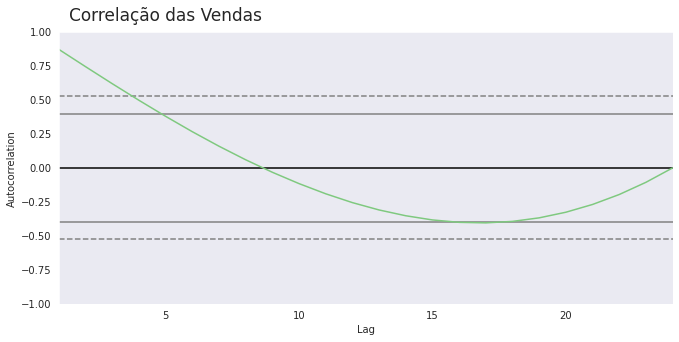

In [ ]:
ax = plt.figure(figsize=(11, 5))
ax.suptitle('Correlação das Vendas', fontsize=17, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

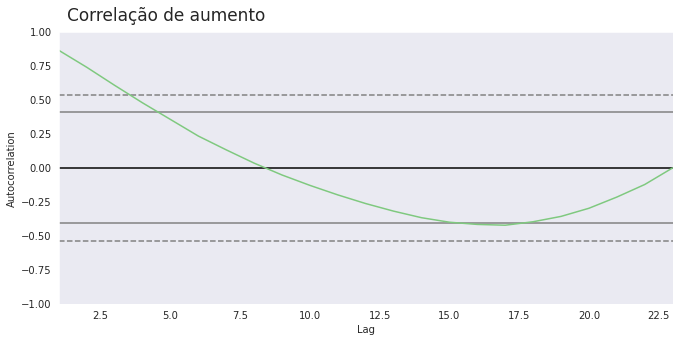

In [ ]:
ax = plt.figure(figsize=(11, 5))
ax.suptitle('Correlação de aumento', fontsize=17, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

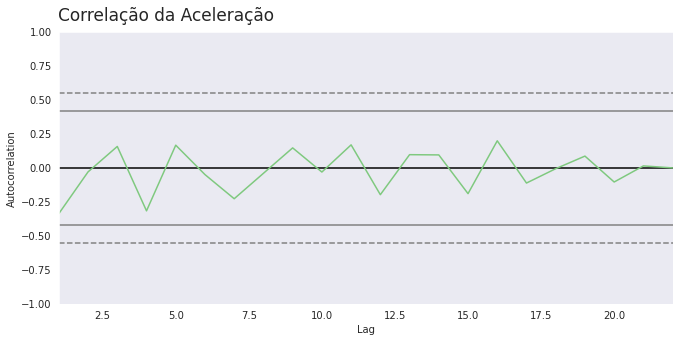

In [ ]:
ax = plt.figure(figsize=(11, 5))
ax.suptitle('Correlação da Aceleração', fontsize=17, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [ ]:
'''A partir desses gráficos, podemos concluir que os 7 primeiros meses parecem
 ter uma ligação muito forte com os meses passados. Com o passar dos Lags essa
  correlação decrescerá.'''

'A partir desses gráficos, podemos concluir que os 7 primeiros meses parecem\n ter uma ligação muito forte com os meses passados. Com o passar dos Lags essa\n  correlação decrescerá.'

# Allucar - Análisando os assinantes da NewsLetter

> A empresa Alucar possui uma Newsletter mensal sobre descontos e promoções. Depois de dois anos da criação dessa Newsletter, foi solicitada uma análise para descobrir o comportamento do número de assinantes dela, se tem aumentado ou diminuído.

In [ ]:
assinantes = pd.read_csv('/content/NEWSLE~1.CSV')

In [ ]:
assinantes.head()


,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
# Ferificando os dipos de dados

assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
# Qual é a quantidade de linhas e colunas e a de dados nulos, gerando prints.

print('Quantidades de linhas e colunas: ', assinantes.shape)
print('Quantidades de dados nulos: ', assinantes.isna().sum().sum())

Quantidades de linhas e colunas:  (24, 2)
Quantidades de dados nulos:  0


In [ ]:
# Convertendo a coluna mes pra datetime

assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

> Com o conhecimento que já adquirimos no DataFrame do Alucar, vamos fazer o diff para descobrir o aumento e a aceleração do número de assinantes.

In [ ]:
assinantes['aumento'] = assinantes ['assinantes'].diff()
assinantes['aceleracao'] = assinantes ['aumento'].diff()

In [ ]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


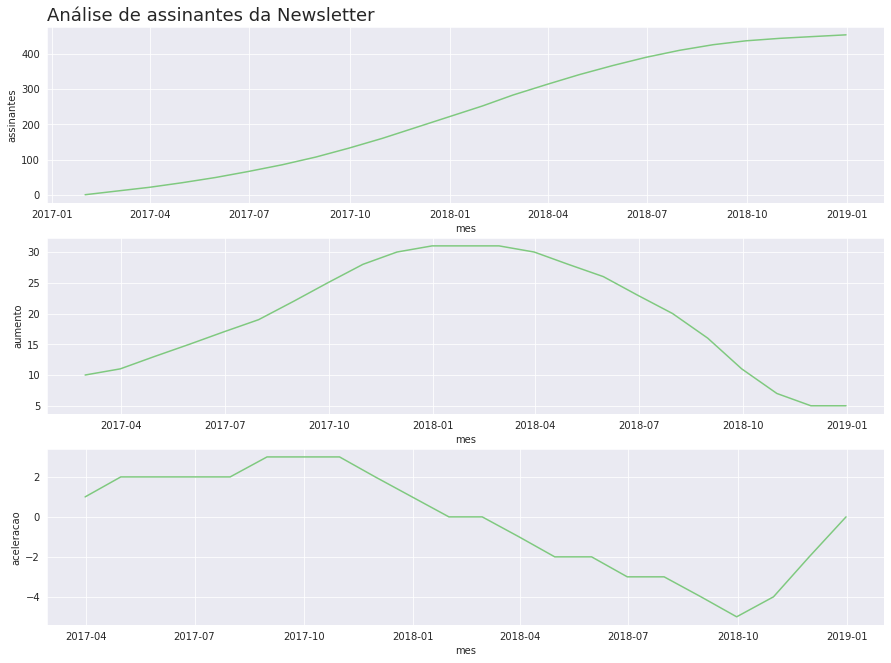

In [ ]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da Newsletter')

Com esses gráficos, veremos que decompondo as vendas poderemos encontrar casos muito interessantes.

# Chocolura

In [ ]:
chocolura = pd.read_csv('/content/CHOCOL~1.CSV')

In [ ]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
# Transformando a coluna em datetime

chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [ ]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print('Quantidades de linhas e colunas: ', chocolura.shape)
print('Quantidade de dados nulos: ', chocolura.isna().sum().sum())

Quantidades de linhas e colunas:  (24, 2)
Quantidade de dados nulos:  0


In [ ]:
# Agora, vamos fazer o diff do aumento das vendas e da aceleração do aumento.

In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

In [ ]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


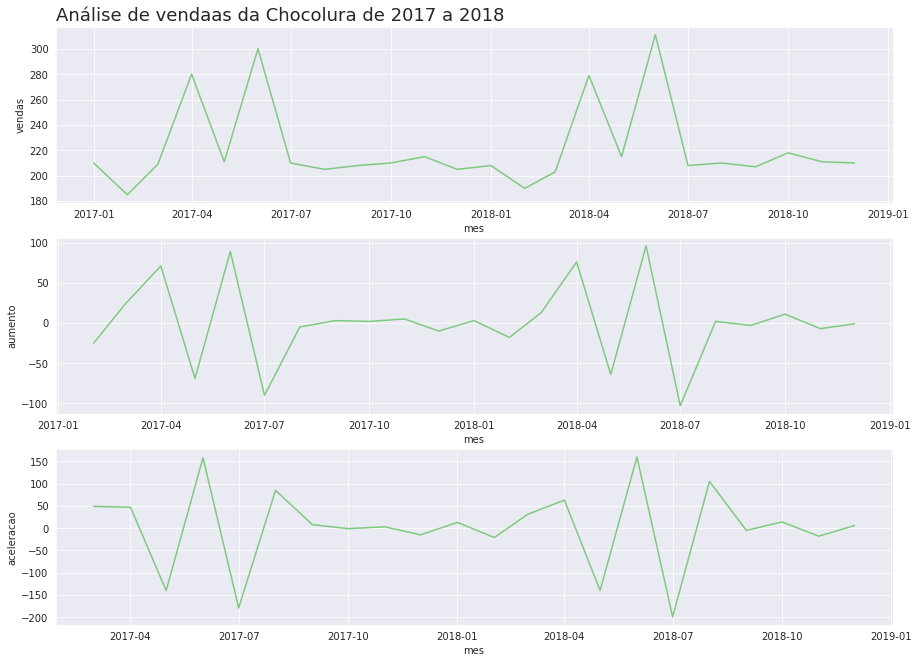

In [ ]:
# Agora, faremos o plot de comparação.

plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendaas da Chocolura de 2017 a 2018')

**O que descobrimos**
> Há um aumento no mês 4 de acordo com o gráfico, e uma grande queda na sequência. Depois as vendas aumentam novamente no mês 6.

> No mês 4 de todos os anos costuma haver a data da Páscoa e em Junho, o Dia dos Namorados. As vendas de chocolates da Chocolura, pelo gráfico de vendas, é maior até em Junho do que em Abril.

# Chocolura - Vendas diárias (Outubro e Novembro)

> A Chocolura possui diversas lojas espalhadas pelo país, cada uma com seus gerentes, suas regras de negócios e seus vendedores.

>> Uma loja em especial chamou muito a atenção dos diretores da empresa pelas vendas diárias nos meses de Outubro e Novembro de 2018. Tentaremos analisar o que terá acontecido.

In [ ]:
vendas_por_dia = pd.read_csv('/content/VENDAS~1.CSV')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
print('Quantidades de linhas e colunas', vendas_por_dia.shape)
print('Quantidade de dados nulos', vendas_por_dia.isna().sum().sum())

Quantidades de linhas e colunas (61, 2)
Quantidade de dados nulos 0


In [ ]:
# Tipos de dados das colunas

vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])

In [ ]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
# Faremos, então, um diff do aumento e das vendas para descobrir a aceleração.

vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


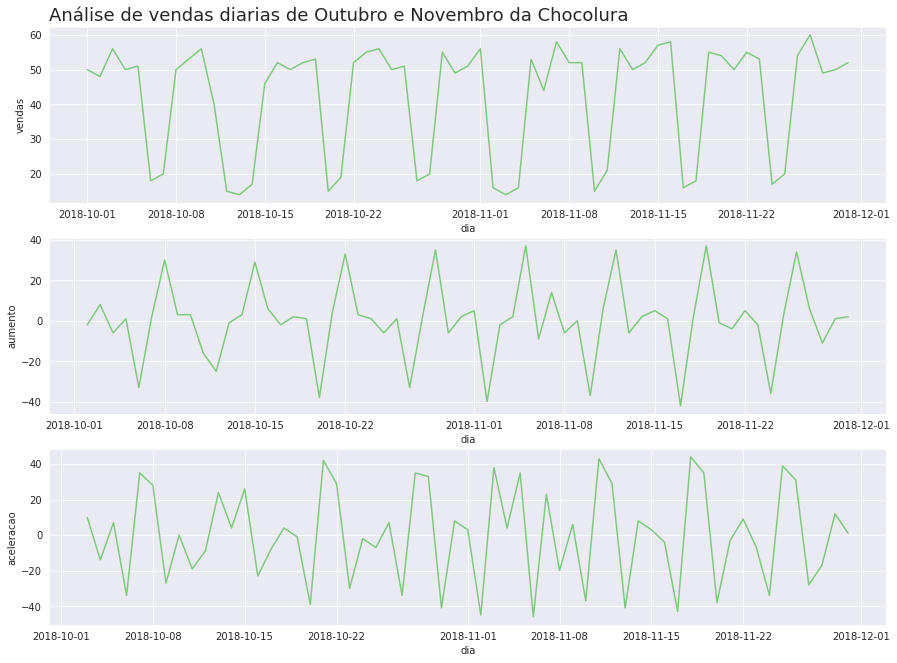

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas diarias de Outubro e Novembro da Chocolura')

**Análisando a Sazonalidade**

a técnica de normalização seria a mais indicada. Sempre que estiver acompanhando números agregados em uma time series como resultados semanais, mensais ou trimestrais, podemos utilizar a técnica de normalização.

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()

In [ ]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


> Porém, os dados estarão todos em inglês (Monday, Tuesday, Wednesday, etc.). Vamos simplificar deixando-os em Português. Pegaremos todos os dados de dias da semana e usaremos o **unique**, que nos retornará todos os valores únicos quanto aos dias da semana.

In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
# Traduzindo os dia para português

dias_traduzidos = {'Monday': 'Segunda',
                   'Tuesday': 'Terça',
                   'Wednesday': 'Quarta',
                   'Thursday': 'Quinta',
                   'Friday': 'Sexta',
                   'Saturday': 'Sábado',
                   'Sunday': 'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(15)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


> Podemos observar que nos sábados e domingos e no feriado do dia 12 de Outubro as vendas foram bem menores do que em comparação com os dias da semana. Isso pode significar que a empresa durante esses dias não abra durante todo o horário comercial, ou não disponibilize todos os seus vendedores, porque há vendas, mas elas são diminutas.



*Para conseguir afirmar categoricamente se as vendas sempre são menores aos finais-de-semana, vamos agrupar e obter médias dos valores de cada dia da semana. Faremos isso não só para as médias das vendas, como também para o aumento e a aceleração.*

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


In [ ]:
''''Executaremos esse código No Domingo, a média das vendas será 19.0 e do
aumento, 3.0. No sábado, a média das vendas será 16 e a do aumento -28.0. Então
sábado de fato será o dia mais fraco para as vendas. Nos demais dias, exceto por
 Sexta (45.0), Sábado e Domingo, a média das vendas será sempre maior do que 50.'''

"'Executaremos esse código No Domingo, a média das vendas será 19.0 e do \naumento, 3.0. No sábado, a média das vendas será 16 e a do aumento -28.0. Então \nsábado de fato será o dia mais fraco para as vendas. Nos demais dias, exceto por\n Sexta (45.0), Sábado e Domingo, a média das vendas será sempre maior do que 50."

**-- Conclusão --**
> Então,podemos concluir analisando a sazonalidade que as quedas representadas no gráfico serão referentes aos finais-de-semana. Por alguma regra dos negócios da empresa, esses dias, contando com feriados, contaram bastante para a tendência que nosso gráfico apresentará.

**Correlção das vendas diárias**

Agora, veremos se os valores de vendas, aumento e aceleração estarão correlacionados.

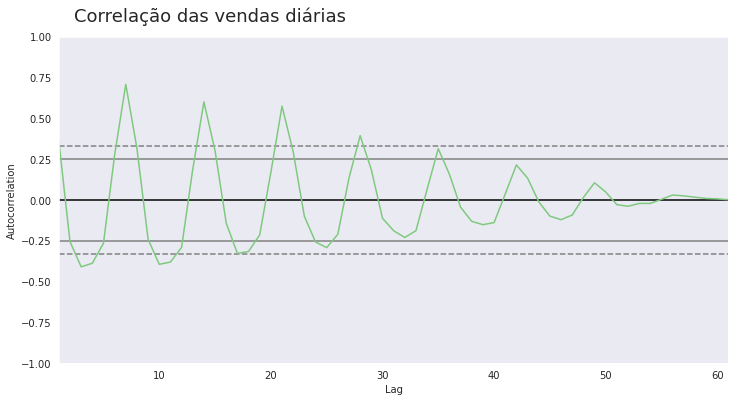

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax


>  Teremos, então, uma correlação muito forte, que chega a sair da margem de significância atingindo 0.75, e diminui conforme os Lags.

Faremos o mesmo para o aumento e para a aceleração. Lembrando que dno caso do aumento não começaremos do índice 0, mas do índice 1

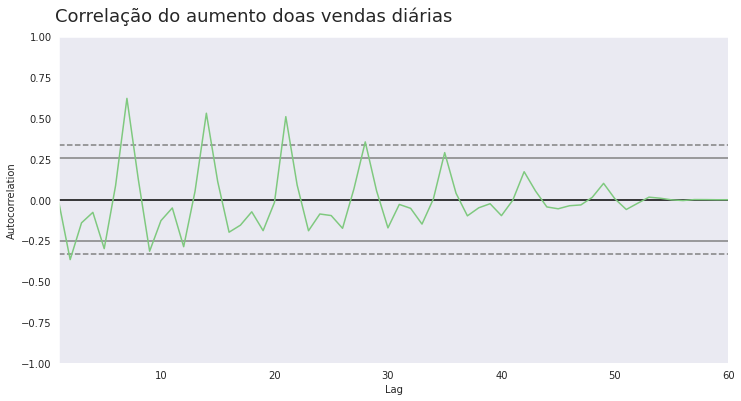

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento doas vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

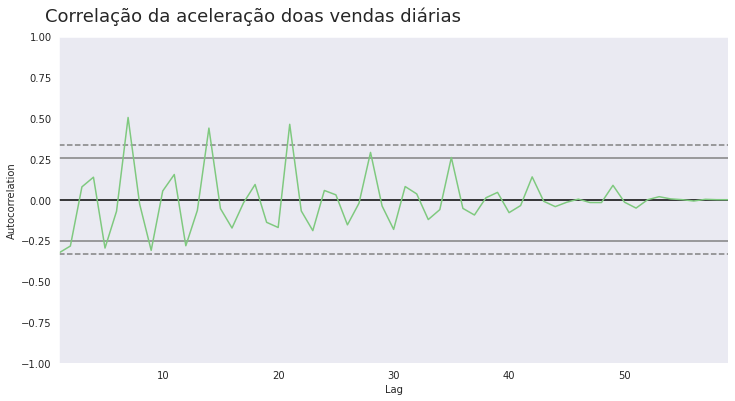

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração doas vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

# Cafelura - Análisee de vendas

In [ ]:
cafelura = pd.read_csv('/content/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
# Alterar o mes pra datetime
cafelura['mes'] = pd.to_datetime(cafelura['mes'])

In [ ]:
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
# Quntidades de linhas e colunas e valores nulos

print('Quantidade de linhas e colunas: ',cafelura.shape)
print('Quantidades de dados nulos: ', cafelura.isna().sum().sum())

Quantidade de linhas e colunas:  (24, 2)
Quantidades de dados nulos:  0


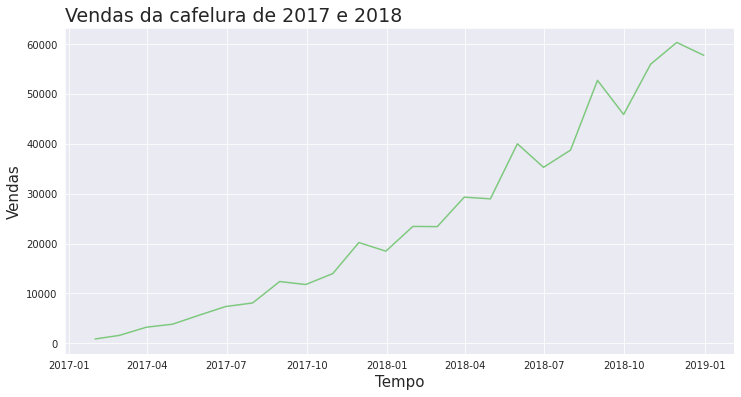

In [ ]:
plotar('Vendas da cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [ ]:
quantidade_de_dias_fds = pd.read_csv('DIAS_F~1.CSV')
quantidade_de_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
# Vamos ver só os valores

quantidade_de_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

> Agora que teremos esses valores, dividiremos o número das vendas pela quantidade de finais de semana que tivemos. Em seguida, já visualizaremos os primeiros registros.

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


> Faremos um plot das vendas normalizadas, portanto. Chamaremos a função plotar e completaremos os campos.

plotar(titulo, labelx, labely, x, y, dataset)

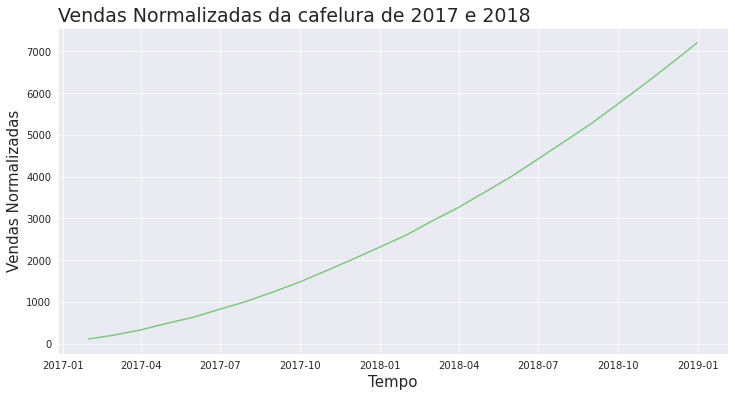

In [ ]:
plotar('Vendas Normalizadas da cafelura de 2017 e 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura )

In [ ]:
'''Nesse caso não teremos 3, apenas 2 no subplot. Queremos que todo o espaço
seja ocupado e que o primeiro plot seja o primeiro gráfico.'''

'Nesse caso não teremos 3, apenas 2 no subplot. Queremos que todo o espaço \nseja ocupado e que o primeiro plot seja o primeiro gráfico.'

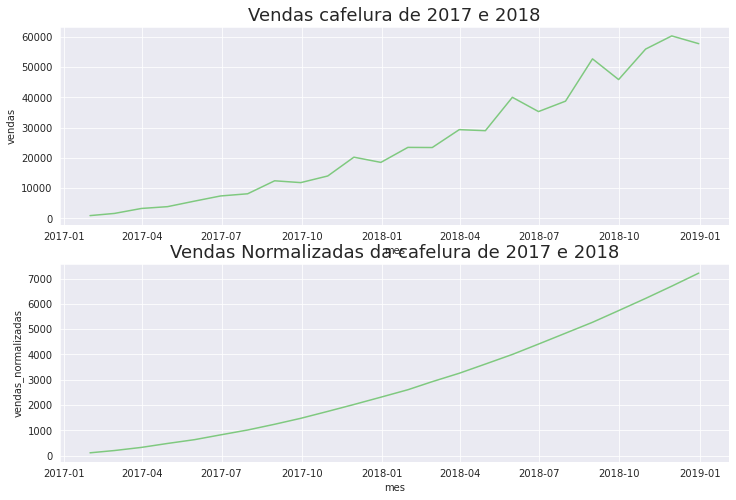

In [ ]:
plt.figure(figsize=(12,8))
ax = plt.subplot(2,1,1)
ax.set_title('Vendas cafelura de 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax = plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas da cafelura de 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax = ax

Então teremos as duas formas das vendas apresentadas nos gráficos, tanto as vendas quanto as vendas normalizadas de acordo com a quantidade de dias de finais de semana.

# Statsmodels

Analisamos uma time series importando da biblioteca statsmodels.tsa.seasonal a função seasonal_decompose, que nos mostra o que é a nossa observação, tendência, sazonalidade e ruído de uma só vez

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

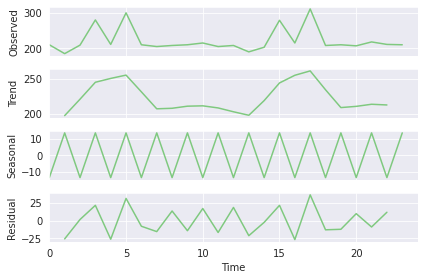

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq=2)
ax = resultado.plot()

Vamos exibir esses gráficos em tamanho maior utilizando nossa função plot_comparacao

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

Armazenamos a lista em todas as variáveis. Agora, criaremos um DataFrame com todos esses valores. Visualizaremos ele logo depois.

In [ ]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazionalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazionalidade,ruido
0,210,NaN,-13.386364,NaN
1,185,197.25,13.386364,-25.636364
2,209,220.75,-13.386364,1.636364
3,280,245.00,13.386364,21.613636
4,211,250.50,-13.386364,-26.113636


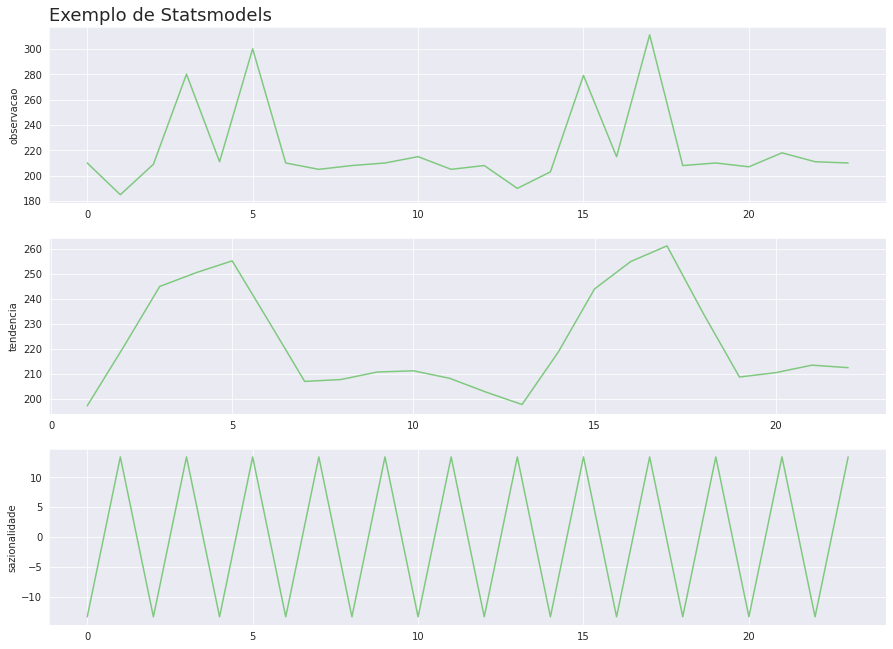

In [ ]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazionalidade', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de vendas

**Nos foram passados os dados de uma determinada empresa do ramo de telefonia e celulares. Foi pedido que avaliássemos o rendimento da empresa. Faremos isso agora.**

A pergunta que nos foi feita quando recebemos esses dados foi se a empresa continuará crescendo e tendo boas vendas ou não?

In [ ]:
alucel  = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
# Tipos de dados das colunas

alucel.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
# convertendo o dia em datetime
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
print('Quantidade de linhas e colunas: ', alucel.shape)
print('Quantidades de dados nulos: ', alucel.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidades de dados nulos:  0


Faremos o diff para comparar o aumento e a aceleração, e visualizaremos os primeiros registros em seguida.

In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()

In [ ]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


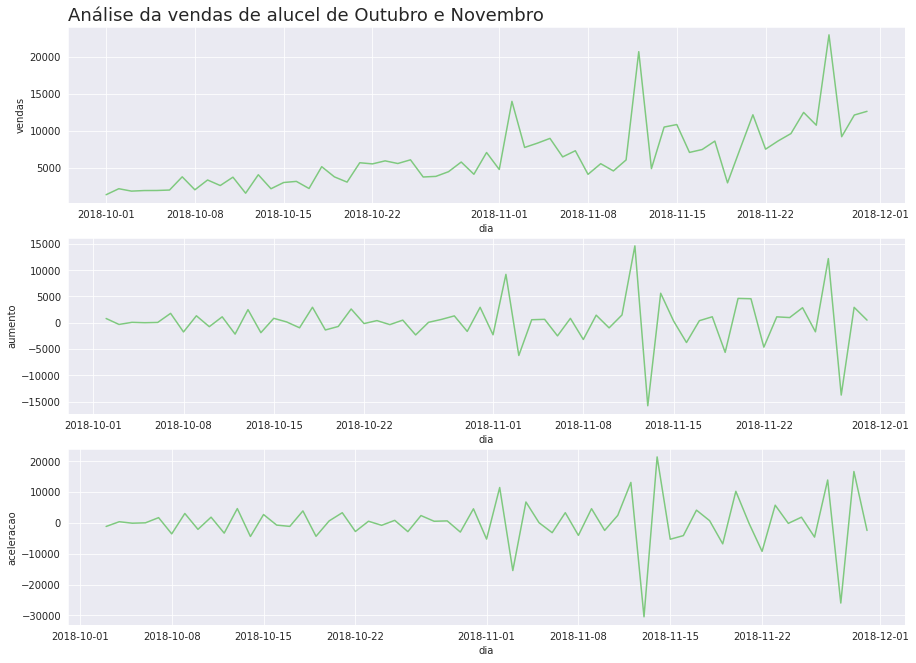

In [ ]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise da vendas de alucel de Outubro e Novembro')

> Nosso gráfico de vendas, como vimos, tem bastante ruído. O de aumento se manteve linear no início, mas teve uma queda importante um pouco antes do dia 15. Analisando a aceleração, também tivemos valores positivos a princípio, e depois uma queda bastante drástica. Mas no geral, há ruído em muitos pontos.

**Média Móvel**

Existe uma técnica muito conhecida e utilizada para a redução desses ruídos Média Móvel

>A ideia é tentar minimizar os ruídos de uma série temporal através de médias móveis, pegando dois ou mais pontos e calculando uma média de 7 dias entre eles. Depois, é calculada a média de mais 7 dias, e os pontos serão marcados para minizar a dispersão da frequência.

In [ ]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [ ]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN


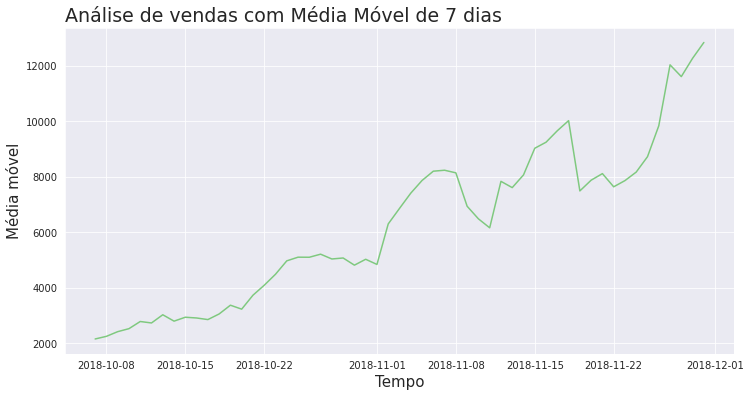

In [ ]:
plotar('Análise de vendas com Média Móvel de 7 dias', 'Tempo', 'Média móvel', 'dia', 'media_movel', alucel)

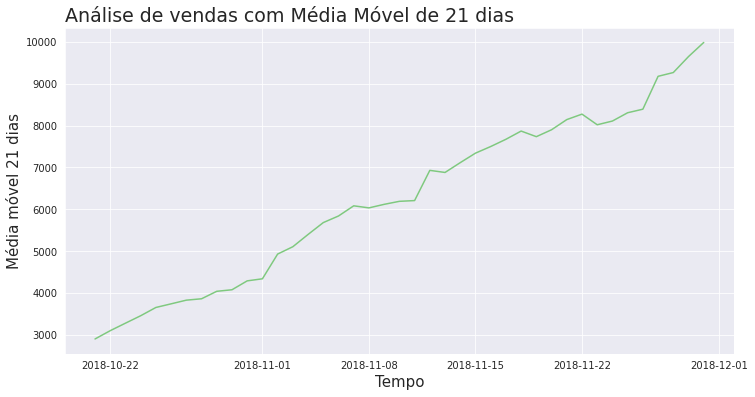

In [ ]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
plotar('Análise de vendas com Média Móvel de 21 dias', 'Tempo', 'Média móvel 21 dias', 'dia', 'media_movel_21', alucel)

Para finalizar, vamos plotar os trẽs gráficos junto. o de vendas, o da Média Móvel de 7 dias e o da Média de 21 dias. Usaremos o plot_comparacao.

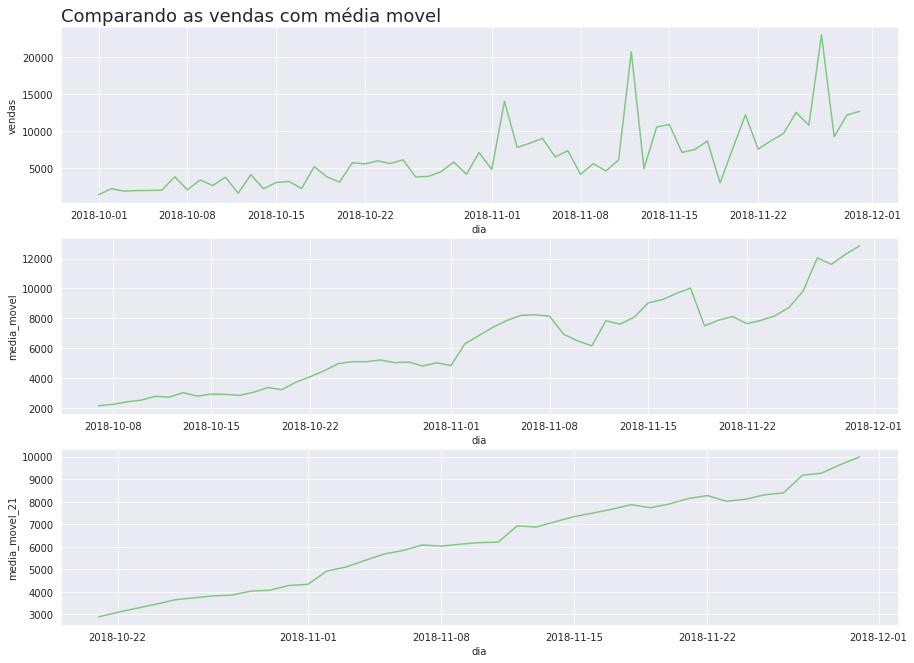

In [ ]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as vendas com média movel')